# KSS Visualization during Time

## Dataset Festures
- Filename -> participant reference (20 participants with 4 files (.csv) each)
- Time [s] -> moment of the simulation 
- kss_answer -> KSS value in that moment

## Visualization Plots
- Average KKS Score per Participant
- KSS State Transition per Participant
- Heatmap of Average KSS Over Time

### Imports

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

### Load Data

In [4]:
file_path = '../datasets/sim/sim_filered_34.csv'
df = pd.read_csv(file_path, delimiter=',')

## Average KSS Score per Participant 

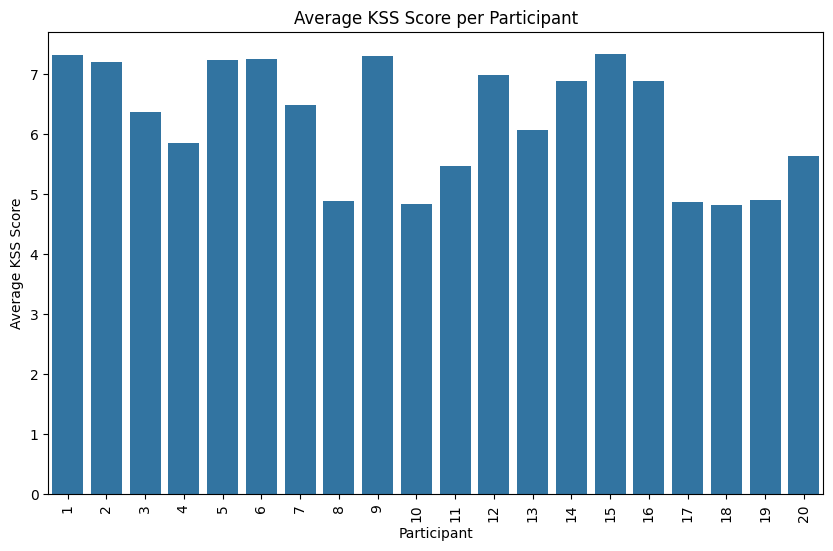

In [24]:
# group instaces of each participant
df['part'] = df['Filename'].apply(lambda x: int(x.split('_')[0][2:])) 
df['record'] = df['Filename'].apply(lambda x: int(x.split('_')[1][0])) 

# get the mean KSS score for each participant
avg_kss = df.groupby('part')['kss_answer'].mean().reset_index()

# plot KKS avereges
plt.figure(figsize=(10, 6))
sns.barplot(x='part', y='kss_answer', data=avg_kss)
plt.xlabel('Participant')
plt.ylabel('Average KSS Score')
plt.title('Average KSS Score per Participant')
plt.xticks(rotation=90)
plt.show()

## KSS State Transition per Participant

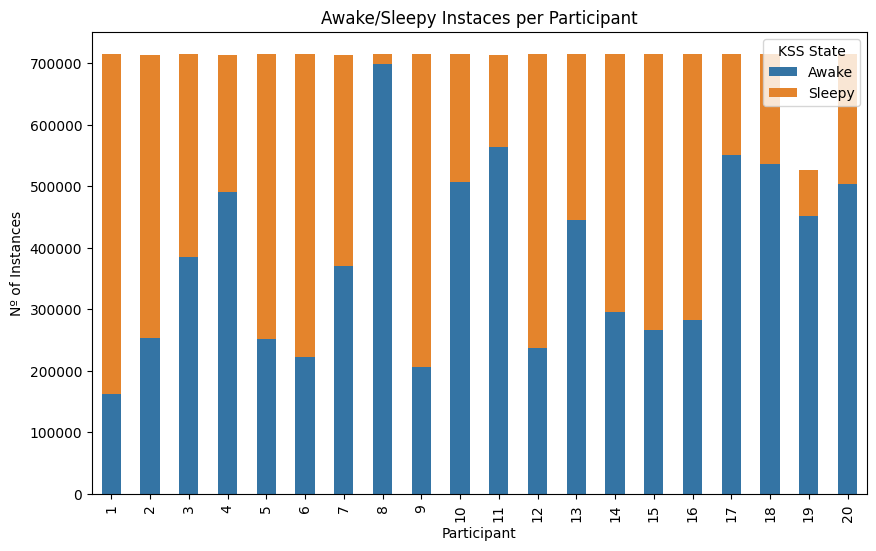

In [25]:
# classify KSS states
def classify_kss(kss_score):
    if 1 <= kss_score <= 6:
        return 'Awake'
    elif 7 <= kss_score <= 9:
        return 'Sleepy'

# apply classification
df['KSS_State'] = df['kss_answer'].apply(classify_kss)

# count occurrences of each state per participant
kss_distribution = df.groupby(['part', 'KSS_State']).size().unstack(fill_value=0)

# colors
colors = ['#3474a4', '#e4842c']

# Create a ListedColormap
cmap = ListedColormap(colors)

# plot states
kss_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)
plt.xlabel('Participant')
plt.ylabel('Nº of Instances')
plt.title('Awake/Sleepy Instaces per Participant')
plt.xticks(rotation=90)
plt.legend(title='KSS State')
plt.show()


## Heatmap of Average KSS Over Time

C:\Users\duart\AppData\Local\Temp\ipykernel_3092\3399984534.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='time_bin', columns='Filename', values='kss_answer', aggfunc='mean')


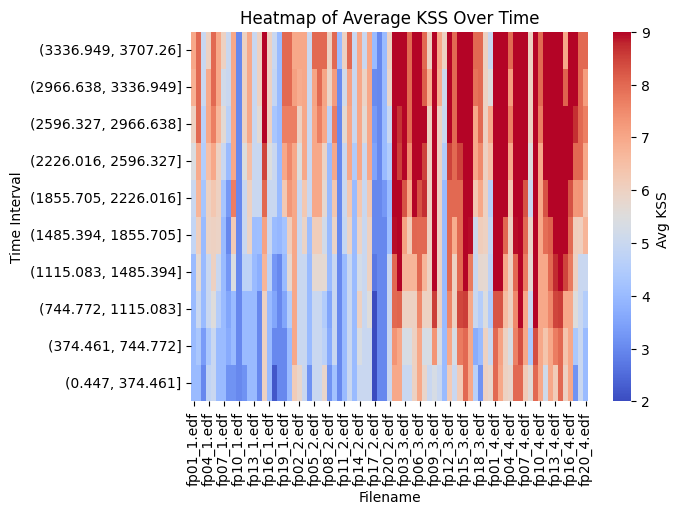

In [26]:
# sort the data for record and participant
df = df.sort_values(by=['record', 'part'])

# create time bins 
df['time_bin'] = pd.cut(df['timer [s]'], bins=10)

# get average kss_answer for each time bin and filename
pivot_table = df.pivot_table(index='time_bin', columns='Filename', values='kss_answer', aggfunc='mean')

# sort by the new filename order
ordered_filenames = df['Filename'].unique()
pivot_table = pivot_table[ordered_filenames]

# sort in revers to align 0 0 of the refrencial with the time
pivot_table = pivot_table.iloc[::-1]

# create the heatmap
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, cbar_kws={'label': 'Avg KSS '})

# title and labels
plt.title('Heatmap of Average KSS Over Time')
plt.xlabel('Filename')
plt.ylabel('Time Interval')

plt.show()